In [89]:
%run imports.ipynb

### Histone context around Hyper-DMR in INS vs NBM

In [100]:
pos_cols = [f'pos{i}' for i in range(1, 601)]
names = ['chrom', 'start', 'end', 'reference_point', '_1', '_2'] + pos_cols

data = defaultdict(list)
for mark in ['H3K4me1', 'H3K4me3', 'H3K27me3', 'DNase']:
    tmp = pd.read_csv(f'/data2/project/SNUH_DNMT3A/pipelines/DMR-HISTONE-CONTEXT-DEEPTOOLS/result/{mark}.bin10.flank3000.ins_hyper.matrix.gz', 
                      sep='\t', names=names, skiprows=1)
    
    for bin_center, v in zip(np.arange(-2950, 3050, 10), tmp[pos_cols].mean(axis=0)):
        data['mark'].append(mark)
        data['bin_center'].append(bin_center)
        data['average_cpm'].append(v)
        
data = pd.DataFrame(data).sort_values(['mark', 'bin_center'])
data.to_csv('source_data/histone_context_around_ins_vs_nbm_hyper.csv', index=False)

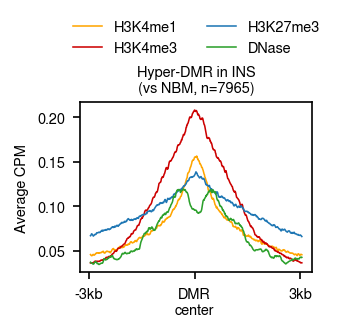

In [104]:
data = pd.read_csv('source_data/histone_context_around_ins_vs_nbm_hyper.csv')

mark2color = {
    'H3K4me1': 'orange',
    'H3K4me3': '#CC0000',
    'H3K27me3': 'C0',
    'DNase': 'C2',
}

fig = plt.figure(figsize=(2, 1.5))
ax = fig.add_subplot(111)

ax.set_title('Hyper-DMR in INS\n(vs NBM, n=7965)', pad=5, fontsize=7)

for mark in ['H3K4me1', 'H3K4me3', 'H3K27me3', 'DNase']:
    d = data[data.mark == mark]
    ax.plot(d.bin_center, d.average_cpm, label=mark, lw=0.75, c=mark2color[mark])
        
ax.legend(frameon=False, bbox_to_anchor=(0.5, 1.2), loc='lower center', ncol=2)

ax.set_xticks([-3000, 0, 3000])
ax.set_xticklabels(['-3kb', 'DMR\ncenter', '3kb'])

ax.set_ylabel('Average CPM')
save_figures('source_data_figures/histone_context_analysis/histone_context_around_ins_vs_nbm_hyper')